In [7]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns


### 1.데이터 불러오기

In [4]:
data = pd.read_csv('bike_data.csv', header=0)
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.head()

,breakdown,intensity,meanDist,age,summer
0,1,115,3727,19,0
1,1,105,3323,26,0
2,1,105,3480,29,0
3,1,104,3356,29,0
4,1,103,3617,32,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367102 entries, 0 to 367101
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   breakdown  367102 non-null  int64
 1   intensity  367102 non-null  int64
 2   meanDist   367102 non-null  int64
 3   age        367102 non-null  int64
 4   summer     367102 non-null  int64
dtypes: int64(5)
memory usage: 14.0 MB


### 데이터설명
desired target : <br>
1 - breakdown : 고장여부(0:고장X, 1:고장O) (numeric) <br>


input variables : <br>
2 - intensity : 이용강도(단위시간 당 평균 이동 거리)<br>
3 - meanDist : 평균이용거리(1회 이용 당 평균 이동 거리)<br>
4 - age : 따릉이 수명(실제로 이용된 기간, 마지막 대여이력 - 첫 대여이력)<br>
5 - summer : 따릉이가 7월을 얼마나 겪었는지 (7월 장마기간동안 자전거의 쇠가 녹슬음)

### 2. 데이터 탐색

In [6]:
data['breakdown'].value_counts()

1    183551
0    183551
Name: breakdown, dtype: int64

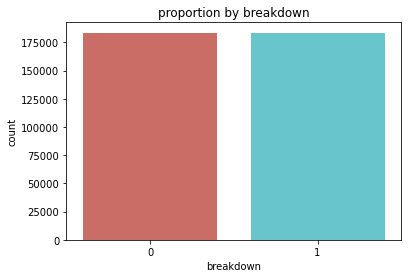

<Figure size 432x288 with 0 Axes>

In [12]:
sns.countplot(x='breakdown', data=data, palette='hls')
plt.title('proportion by breakdown')
plt.show()
plt.savefig('ml_count_plot')

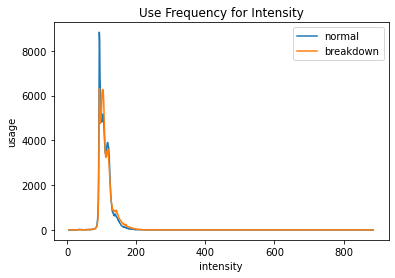

In [20]:
%matplotlib inline
pd.crosstab(data.intensity, data.breakdown).plot()
plt.title('Use Frequency for Intensity')
plt.xlabel('intensity')
plt.ylabel('usage')
plt.legend(['normal', 'breakdown'])
plt.savefig('ml_usage_fre_intensity')

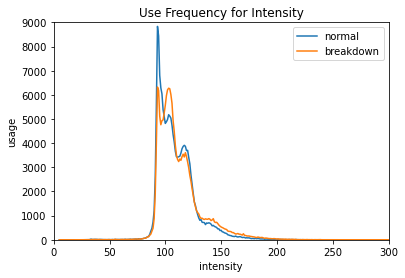

In [21]:
pd.crosstab(data.intensity, data.breakdown).plot()
plt.title('Use Frequency for Intensity')
plt.xlabel('intensity')
plt.ylabel('usage')
plt.xlim(0, 300)
plt.ylim(0,9000)
plt.legend(['normal', 'breakdown'])
plt.savefig('ml_usage_fre_intensity2')

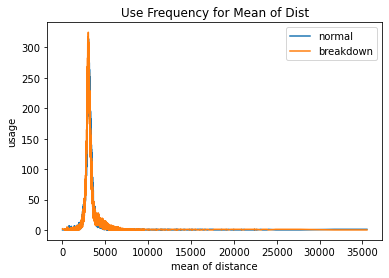

In [24]:
pd.crosstab(data.meanDist, data.breakdown).plot()
plt.title('Use Frequency for Mean of Dist')
plt.xlabel('mean of distance')
plt.ylabel('usage')
plt.legend(['normal', 'breakdown'])
plt.savefig('ml_usage_fre_meanDist')

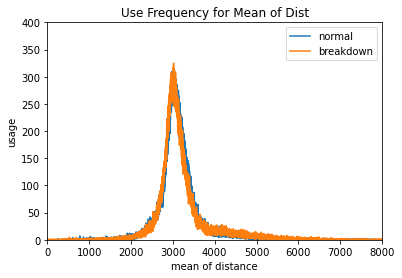

In [25]:
pd.crosstab(data.meanDist, data.breakdown).plot()
plt.title('Use Frequency for Mean of Dist')
plt.xlabel('mean of distance')
plt.ylabel('usage')
plt.xlim(0, 8000)
plt.ylim(0,400)
plt.legend(['normal', 'breakdown'])
plt.savefig('ml_usage_fre_meanDist2')

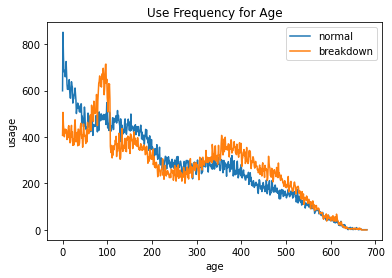

In [26]:
pd.crosstab(data.age, data.breakdown).plot()
plt.title('Use Frequency for Age')
plt.xlabel('age')
plt.ylabel('usage')
plt.legend(['normal', 'breakdown'])
plt.savefig('ml_usage_fre_age')

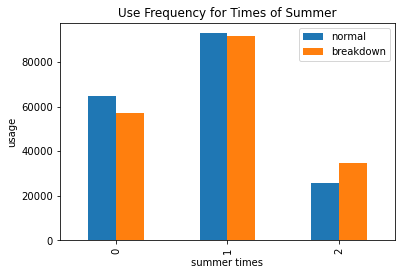

In [28]:
pd.crosstab(data.summer,data.breakdown).plot(kind='bar')
plt.title('Use Frequency for Times of Summer')
plt.xlabel('summer times')
plt.ylabel('usage')
plt.legend(['normal', 'breakdown'])
plt.savefig('ml_usage_fre_summertimes')

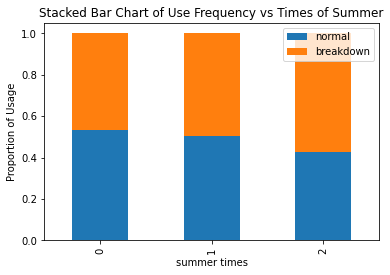

In [30]:
table=pd.crosstab(data.summer, data.breakdown)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Use Frequency vs Times of Summer')
plt.xlabel('summer times')
plt.ylabel('Proportion of Usage')
plt.legend(['normal', 'breakdown'])
plt.savefig('ml_usage_fre_summertimes2')